In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
commit = pd.io.sql.read_sql("select cast(strftime('%H', timestamp) as int) as hour, timestamp as datetime from checker where uid LIKE 'user_%'", con=connect, parse_dates='datetime')

In [4]:
commit['is_weekend'] = commit.datetime.dt.weekday.map(lambda x: 1 if x in (5, 6) else 0)
commit['date'] = commit.datetime.dt.date

In [5]:
weekend = commit[commit.is_weekend == 1].hour
working = commit[commit.is_weekend != 1].hour

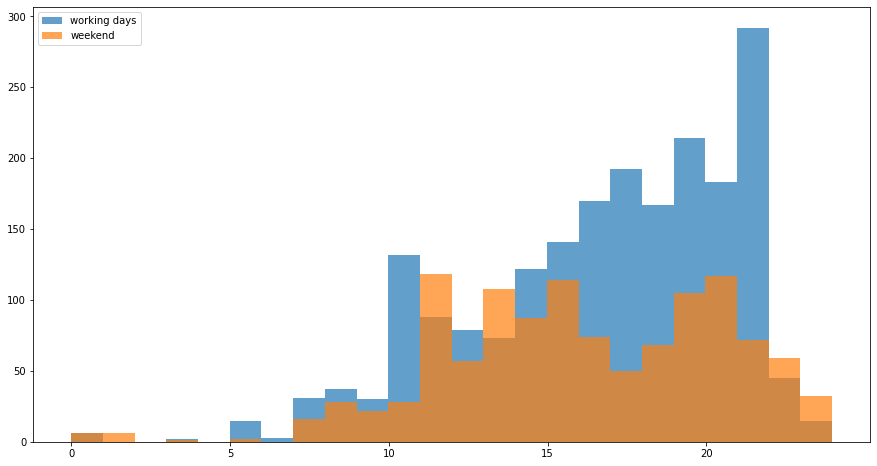

In [18]:
plt.figure(figsize=(15,8))
plt.xticks([x / 10.0 for x in range(0, 230, 48)],  map(lambda x : round(x), [x / 10.0 for x in range(0, 250, 50)]))
plt.hist(working, alpha=0.7, bins=24,stacked=True)
plt.hist(weekend, alpha=0.7, bins=24,stacked=True)
plt.legend(['working days', 'weekend']);

__11, 13, 22, 23__